In [22]:
!pip install yfinance
!pip install pandas
!pip install matplotlib
!pip install requests beautifulsoup4 pandas

import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup


In [9]:
tesla_data = yf.Ticker("TSLA")
tesla_stock = tesla_data.history(period="max")
tesla_stock.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [42]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
data  = requests.get(url).text
soup = BeautifulSoup(data,"html.parser")

tesla_tables = soup.find_all('table')

for index,table in enumerate(tesla_tables):
    if ("Tesla Quarterly Revenue" in str(table)):
        tesla_table_index = index
 
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
 
for row in tesla_tables[tesla_table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col !=[]):
        date = col[0].text
        revenue = col[1].text.replace("$", "").replace(",", "")
        new_row = pd.DataFrame({"Date": [date], "Revenue": [revenue]})
        tesla_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)
tesla_revenue.head()

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757


In [44]:
gme_data = yf.Ticker("GME")
gme_stock = gamestop_data.history(period="max")
gme_stock.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [50]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
data  = requests.get(url).text
soup = BeautifulSoup(data,"html.parser")

gme_tables = soup.find_all('table')

for index,table in enumerate(gme_tables):
    if ("GME Quarterly Revenue" in str(table)):
        tesla_table_index = index
 
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
 
for row in gme_tables[tesla_table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col !=[]):
        date = col[0].text
        revenue = col[1].text.replace("$", "").replace(",", "")
        new_row = pd.DataFrame({"Date": [date], "Revenue": [revenue]})
        tesla_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)
gme_revenue.head()

,Date,Revenue


<Axes: xlabel='Date'>

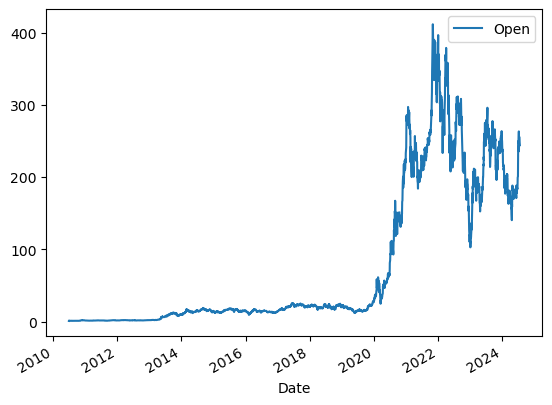

In [36]:
tesla_stock.reset_index(inplace=True)
tesla_stock.plot(x="Date", y="Open")

<Axes: xlabel='Date'>

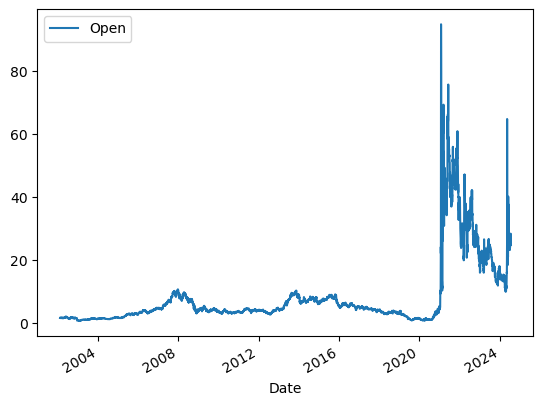

In [48]:
gme_stock.reset_index(inplace=True)
gme_stock.plot(x="Date", y="Open")